# Optimal Replacement of GMC Bus Engines: An empirical model of Harold Zurcher

This notebook replicates the descriptives in Tabla IIa and IIb from
> Rust, J. (1987). [Optimal Replacement of GMC Bus Engines: An empirical model of Harold Zurcher.](https://doi.org/10.2307/1911259) *Econometrica*, Vol. 55, No.5, 999-1033. 

The data is taken from the NFXP software provided by [Rust](https://editorialexpress.com/jrust/nfxp.html) which is available to download [here](https://github.com/OpenSourceEconomics/ruspy/tree/master/data). 

## Preparations

Before executing this file the raw data needs to be processed.

In [7]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

sys.path.insert(0, "../data/")
from data_processing import data_reading  # noqa: E402
from data_processing import get_data_storage  # noqa: E402

In [4]:
data_reading()

### Odometer at Engine Replacement
Table IIa in Rust's paper describes the milage on which a engine replacement occured. As there are buses, which had a second replacement during the time of the observation, the record of the second replacement will be reduced by the milage of the first, to get the real life time milage of an engine.

In [5]:
data_path = get_data_storage()
dict_df = dict()
for filename in os.listdir(data_path + "/pkl/group_data/"):
    if filename.endswith(".pkl"):
        dict_df[filename[0:7]] = pd.read_pickle(
            data_path + "/pkl/group_data/" + filename
        )

In [6]:
df = pd.DataFrame()
for j, i in enumerate(sorted(dict_df.keys())):
    df2 = dict_df[i][["Odo_1"]][dict_df[i]["Odo_1"] > 0]
    df2 = df2.rename(columns={"Odo_1": i})
    df3 = dict_df[i][["Odo_2"]].sub(dict_df[i]["Odo_1"], axis=0)[
        dict_df[i]["Odo_2"] > 0
    ]
    df3 = df3.rename(columns={"Odo_2": i})
    df3 = df3.set_index(df3.index.astype(str) + "_2")
    df4 = pd.concat([df2, df3])
    if j == 0:
        df = df4.describe()
    else:
        df = pd.concat([df, df4.describe()], axis=1)
df = df.transpose()
df.fillna(0).astype(int)

,count,mean,std,min,25%,50%,75%,max
group_1,0,0,0,0,0,0,0,0
group_2,0,0,0,0,0,0,0,0
group_3,27,199733,37459,124800,174550,204800,230650,273400
group_4,33,257336,65477,121300,215000,264100,292400,387300
group_5,11,245290,60257,118000,229600,250600,282250,322500
group_6,7,150785,61006,82400,107450,125500,197750,237200
group_7,27,208962,48980,121000,178650,207700,237200,331800
group_8,19,186700,43956,132000,162900,182100,188400,297500


In [7]:
i = "group_4"
df_group_4_rep_1 = dict_df[i][["Odo_1"]][dict_df[i]["Odo_1"] > 0]
df_group_4_rep_1 = df_group_4_rep_1.rename(columns={"Odo_1": i})
df_group_4_rep_2 = dict_df[i][["Odo_2"]].sub(dict_df[i]["Odo_1"], axis=0)[
    dict_df[i]["Odo_2"] > 0
]
df_group_4_rep_2 = df_group_4_rep_2.rename(columns={"Odo_2": i})
df_group_4_rep_2 = df_group_4_rep_2.set_index(df3.index.astype(str) + "_2")
df_group_4 = pd.concat([df_group_4_rep_1, df_group_4_rep_2])

In [8]:
bins = 10
hist_data = np.histogram(df_group_4["group_4"].to_numpy(), bins=bins)
hist_data

(array([2, 3, 1, 4, 3, 8, 6, 3, 1, 2]),
 array([121300., 147900., 174500., 201100., 227700., 254300., 280900.,
        307500., 334100., 360700., 387300.]))

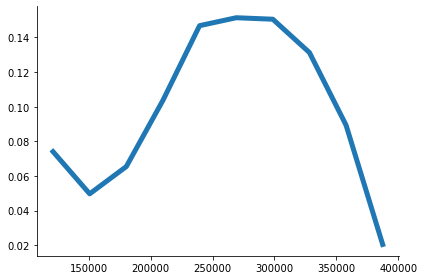

In [9]:
hist_normed = hist_data[0] / sum(hist_data[0])
x = np.linspace(np.min(hist_data[1]), np.max(hist_data[1]), bins)
hist_filter = savgol_filter(hist_normed, 9, 3)

fig, ax = plt.subplots(1, 1)
ax.plot(x, hist_filter)

### Never failing buses

Table IIb explores buses, which never had an engine replacement. Therefore this data is left-censored, as the econometrican never observes the time of replacement. The table shows the variation in the odometer record at the end of the observation period.

In [10]:
df = pd.DataFrame()
for i in sorted(dict_df.keys()):
    df2 = dict_df[i][[dict_df[i].columns.values[-1]]][dict_df[i]["Odo_1"] == 0]
    df2 = df2.rename(columns={df2.columns.values[0]: i})
    if j == 0:
        df = df2.describe()
    else:
        df = pd.concat([df, df2.describe()], axis=1)
df = df.transpose()
df = df.drop(df.columns[[4, 5, 6]], axis=1)
df[["max", "min", "mean", "std", "count"]].fillna(0).astype(int)

,max,min,mean,std,count
group_1,120151,65643,100116,12929,15
group_2,161748,142009,151182,8529,4
group_3,280802,199626,250766,21324,21
group_4,352450,310910,337221,17802,5
group_5,326843,326843,326843,0,1
group_6,299040,232395,265263,33331,3
group_7,0,0,0,0,0
group_8,0,0,0,0,0
